# **MVP de Análise de Dados e Boas Práticas**
## **Análise Exploratória e Agrupamento de Clientes**

# **Definição do problema**

No campo da Ciência de Dados, compreender profundamente os clientes é crucial para o sucesso de qualquer negócio. O Dataset utilizado no projeto é Shop customer Data, disponível em: https://www.kaggle.com/datasets/datascientistanna/customers-dataset. Esse conjunto de dados fornece informações detalhadas sobre os perfis dos clientes loja fictícia, permitindo que a empresa possa entender melhor seu público. A identificação dos clientes é feita por meio de cartões de membro (membership cards). O principal objetivo é extrair insights valiosos que auxiliem o proprietário da loja a entender melhor seu público-alvo, adaptar estratégias de marketing e melhorar a experiência geral do cliente.

A principio o dataset se trata de uma exploração e analise de dados, sendo possivel expandir para um modelo de aprendizado de máquina supervisionado.

## **Datalhamento do dataset**

O dataset contém 2000 registros e 8 colunas, nas quais são:

- Customer ID: Um indentificar único e sequencial para cada cliente
- Gender: Gênero do cliente, podendo ser Masculino (Male) e Feminino (Female)
- Age: Idade do cliente, vatiando de 0 a 99 anos
- Annual Income: Renda anual do cliente, expressa em dólares, podendo ser de $ 0,00 a $ 189.974,00
- Spending Score: Pontuação atribuída pela loja, com base no comportamento do cliente e na natureza dos gastos, podendo ser de (1-100)
- Profession: Profissão do cliente, podendo ser:
    - Healthcare: Profissional da saúde (ex: enfermeiros, técnicos de enfermagem, fisioterapeutas, cuidadores, etc.)
    - Engineer: Engenheiro
    - Lawyer: Advogado
    - Entertainment: Profissional do Entretenimento (ex: atores, músicos, apresentadores, comediantes, influenciadores digitais, etc.)
    - Artist: Artista
    - Executive: Executivo
    - Doctor: Médico
    - Homemaker: Dona de casa
    - Marketing: Profional da área de marketing
    
- Work Experience: Tempo de experiência profissional do cliente, vatinado entre de 0 a 17 anos
- Family Size: Número de integrantes na família do cliente, podendo ir de 1 a 9 pessoas

## **Objetivo**

Com base na definição do problema e o entendimento do dataset, este projeto tem como objetivo principais:
- Desenvolver um modelo de segmentação de clientes preciso e eficaz utilizando o algoritmo K-Means, a fim de categorizar os clientes com base em suas características.
- Descobrir insights significativos sobre o comportamento, as preferências e as tendências dos clientes por meio de uma análise abrangente do conjunto de dados fornecido.
- Fornecer recomendações práticas ao proprietário da loja para refinar as estratégias de marketing, personalizar promoções e otimizar o engajamento com base nos segmentos de clientes identificados.
- Definir claramente perfis distintos de clientes, analisando as relações entre variáveis como idade, renda anual, pontuação de gastos, profissão, experiência de trabalho e tamanho da família.
- Assegurar a integridade do conjunto de dados, tratando valores ausentes ou inconsistências, garantindo assim uma base confiável para as análises subsequentes.


**Caso sejá necessário, as proximas duas celulas de código é utilizada para atualizar o pip para versão mais recente e instalar as bibliotecas importantes para o projeto.**

In [ ]:
pip install --upgrade pip

In [ ]:
pip install matplotlib seaborn scikit-learn

### **Inicialização do projeto**

Iniciaremos o projeto importando as bibliotecas que iremos utilizar:
- Pandas: Biblioteca usada para manipulação e análise de dados tabulares, como planilhas e tabelas.
Permite ler, filtrar, agrupar, transformar e exportar dados de forma eficiente usando estruturas como DataFrame e Series.
- Matplotlib: Biblioteca de visualização gráfica, usada para criar gráficos estáticos como linhas, barras, pizza, dispersão (scatter), entre outros.
- seaborn: Biblioteca de visualização baseada no Matplotlib, porém com gráficos mais bonitos e mais fáceis de criar.
- sklearn: Biblioteca voltada para machine learning e modelagem preditiva.
Fornece ferramentas para pré-processamento de dados, treinamento de modelos, avaliação de desempenho, etc.
    - LabelEncoder: Transforma variáveis categóricas em valores numéricos inteiros. Exemplo: transforma ['masculino', 'feminino'] em [1, 0].
    - MinMaxScaler: Uma técnica popular de normalização de dados usada em aprendizado de máquina para transformar recursos de modo que se ajustem a um intervalo específico, geralmente [0, 1].
    - KMeans: Algoritmo de agrupamento (clustering) que divide os dados em k grupos baseados em semelhanças.
    - silhouette_score: Métrica usada para avaliar a qualidade de agrupamentos (clusters) feitos pelo KMeans (ou outros algoritmos de clustering). Varia de -1 a 1, onde valores próximos de 1 indicam clusters bem definidos.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### **Carga de Dados**
No diretorio do projeto, temos o arquivo Customer.csv, que contem o nosso dataset que será utilizado. Iremos usar o pacote Pandas para carregar o dataset.

In [26]:
#Carregando o dataset
url = 'https://raw.githubusercontent.com/RamomLandim/MVP-de-Analise-de-Dados-e-Boas-Praticas/main/Customers.csv'

# Informando o cabeçalho das colunas
colunas = ['CustomerID','Gender','Age','Annual Income ($)','Spending Score (1-100)','Profession','Work Experience','Family Size']

# Lendo o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

print("Numero de linhas:", len(dataset))


Numero de linhas: 2000


## **Análise de Dados**
Utilizaremos algumas funções para gerar alguns insights com base nas informações fornecidas sobre o conjunto de dados, examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [27]:
# Exibindo as primeiras linhas do DataFrame para verificar o carregamento dos dados
print(dataset.head)

<bound method NDFrame.head of       CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male   19              15000                      39   
1              2    Male   21              35000                      81   
2              3  Female   20              86000                       6   
3              4  Female   23              59000                      77   
4              5  Female   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996  Female   71             184387                      40   
1996        1997  Female   91              73158                      32   
1997        1998    Male   87              90961                      14   
1998        1999    Male   77             182109                       4   
1999        2000    Male   90             110610                      52   

         Profession  Work Experience  Family Size  
0    

In [28]:
# Mostra as dimensões do dataset
print(dataset.shape)

(2000, 8)


In [29]:
# Exibindo as informações basicas sobre o dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB
None


In [30]:
# Verifica o tipo de dataset de cada atributo
print(dataset.dtypes)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object


In [31]:
# Exibir estatísticas descritivas de colunas numéricas
print(dataset.describe())

        CustomerID          Age  Annual Income ($)  Spending Score (1-100)  \
count  2000.000000  2000.000000        2000.000000             2000.000000   
mean   1000.500000    48.960000      110731.821500               50.962500   
std     577.494589    28.429747       45739.536688               27.934661   
min       1.000000     0.000000           0.000000                0.000000   
25%     500.750000    25.000000       74572.000000               28.000000   
50%    1000.500000    48.000000      110045.000000               50.000000   
75%    1500.250000    73.000000      149092.750000               75.000000   
max    2000.000000    99.000000      189974.000000              100.000000   

       Work Experience  Family Size  
count      2000.000000  2000.000000  
mean          4.102500     3.768500  
std           3.922204     1.970749  
min           0.000000     1.000000  
25%           1.000000     2.000000  
50%           3.000000     4.000000  
75%           7.000000     5.00

Aqui estão alguns insights com base nas informações fornecidas sobre o conjunto de dados:
- Valores Ausentes:
    - A coluna "Profession" possui valores ausentes (NaN), conforme indicado pela diferença na contagem de valores não nulos entre as colunas no qual iremos preencher como "Outros" para não perder a informação.

- Variáveis Numéricas:
    - Existem seis variáveis numéricas: CustomerID, Age, Annual Income ($), Spending Score (1-100), Work Experience e Family Size.
    - A variável "Spending Score (1-100)" parece estar em uma escala de 0 a 100, e não exatamente de 1-100 como mostra no cabeçalho do dataset.
- Variáveis Categóricas:
    - Existem duas variáveis categóricas: Gender e Profession.
- Tamanho do Conjunto de Dados:
    - O conjunto de dados contém 2000 entradas (linhas) e 8 colunas

In [32]:
# Substituindo NaN em Profession por Outros
dataset['Profession'] = dataset['Profession'].fillna('Outros')

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              2000 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB
None


## **Insights da Análise Exploratória de Dados (EDA):**

A seguir realizamos algumas analises exploratórias, onde separamos por:
- Variaveis Numéricas: CustomerID, Age, Annual Income ($), Spending Score (1-100), Work Experience e Family Size
- Variáveis Categóricas: Gender e Profession

## **EDA: Variáveis Numéricas**
### **Histograma**

Um histograma serve para visualizar a distribuição de dados, mostrando a frequência com que certos valores ocorrem em um conjunto de dados. Ele é uma ferramenta gráfica que facilita a identificação de padrões, tendências e anomalias em um conjunto de informações.

Iremos então analisar como as variáveis numéricas irão se comportar.

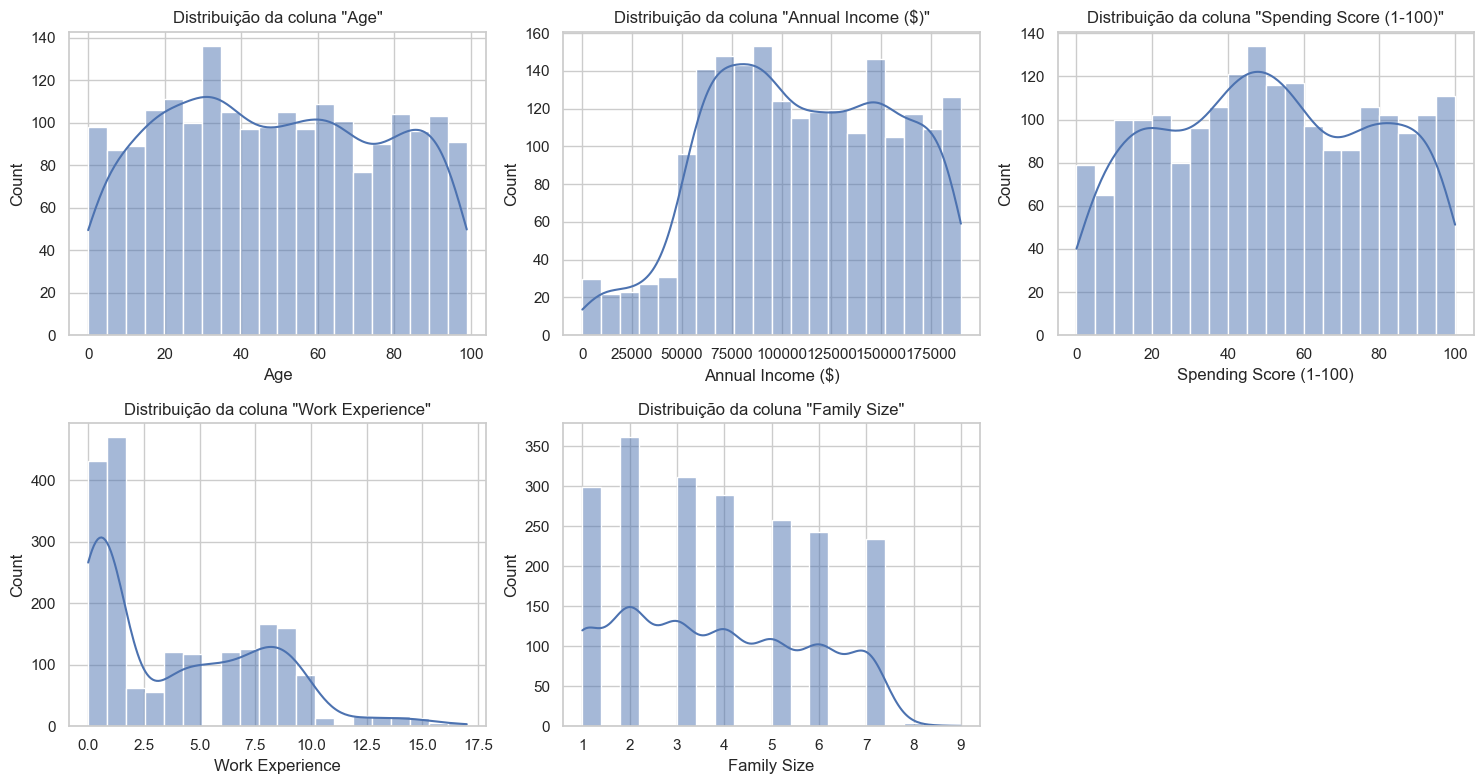

In [33]:
# Selecionando o estilo para o seaborn
sns.set(style="whitegrid")

# Vizualizando a distribução das variaveis numéricas
plt.figure(figsize=(15, 8))

# Histogramas para as variaveis numéricais
for i, col in enumerate(['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size'], start=1):
    plt.subplot(2, 3, i)
    sns.histplot(dataset[col], bins=20, kde=True)
    plt.title(f'Distribuição da coluna "{col}"')

plt.tight_layout()
plt.show()

Como observado nos histogramas acima, diversos insights importantes emergem da distribuição das variáveis numéricas no conjunto de dados.
- Distribuição da idade (Age): Embora a distribuição de idades atinja seu pico entre 22 e 40 anos, a presença de clientes fora dessa faixa indica uma diversidade etária significativa. Essa variedade pode influenciar preferências de produtos, estilos de vida e formas de engajamento, exigindo uma abordagem flexível nas estratégias de marketing.

- Distribuição da Renda Anual (Annual Income): Apesar da maioria dos clientes ter uma renda anual em torno de US$ 70.000, é importante observar a variação nos níveis de renda. Essa diversidade sugere a possibilidade de aplicar estratégias de marketing segmentadas, voltadas para diferentes faixas de rendimento.

- Distribuição do Score (Spending Score): A concentração das pontuações de gastos em torno de 50 indica um comportamento de consumo equilibrado entre os clientes. No entanto, identificar agrupamentos com padrões distintos de gastos será essencial para personalizar promoções e programas de fidelidade para diferentes segmentos de clientes.

- Distribuição da Experiência de Trabalho (Work Experience): A predominância de clientes com cerca de 1 ano de experiência profissional é um ponto relevante. Compreender os comportamentos e preferências desse grupo pode revelar oportunidades de engajamento, programas de mentoria e promoções direcionadas que ressoem com pessoas no início de suas trajetórias profissionais.

- Distribuição do Tamanho da familia (Family Size): A maior parte dos clientes são de famílias com 1 a 3 membros, especialmente com 2 membros, que apresenta o maior número de ocorrências. Isso sugere que a loja pode estar atraindo principalmente indivíduos solteiros, casais ou pequenos núcleos familiares.

Esses insights fornecem uma compreensão inicial das características demográficas e financeiras da base de clientes. Análises mais aprofundadas e a aplicação de técnicas de clusterização ajudarão a revelar padrões e segmentações mais detalhadas, contribuindo para estratégias de negócio mais direcionadas e eficazes.


### **Boxplot**

Um boxplot é uma ferramenta gráfica que serve para representar visualmente a distribuição de um conjunto de dados, destacando a mediana, os quartis, o mínimo e o máximo, além de identificar outliers. Ele permite uma comparação rápida e visual da dispersão e forma da distribuição dos dados, facilitando a análise estatística e a tomada de decisões.

Iremos então analisar como as variáveis numéricas irão se comportar.

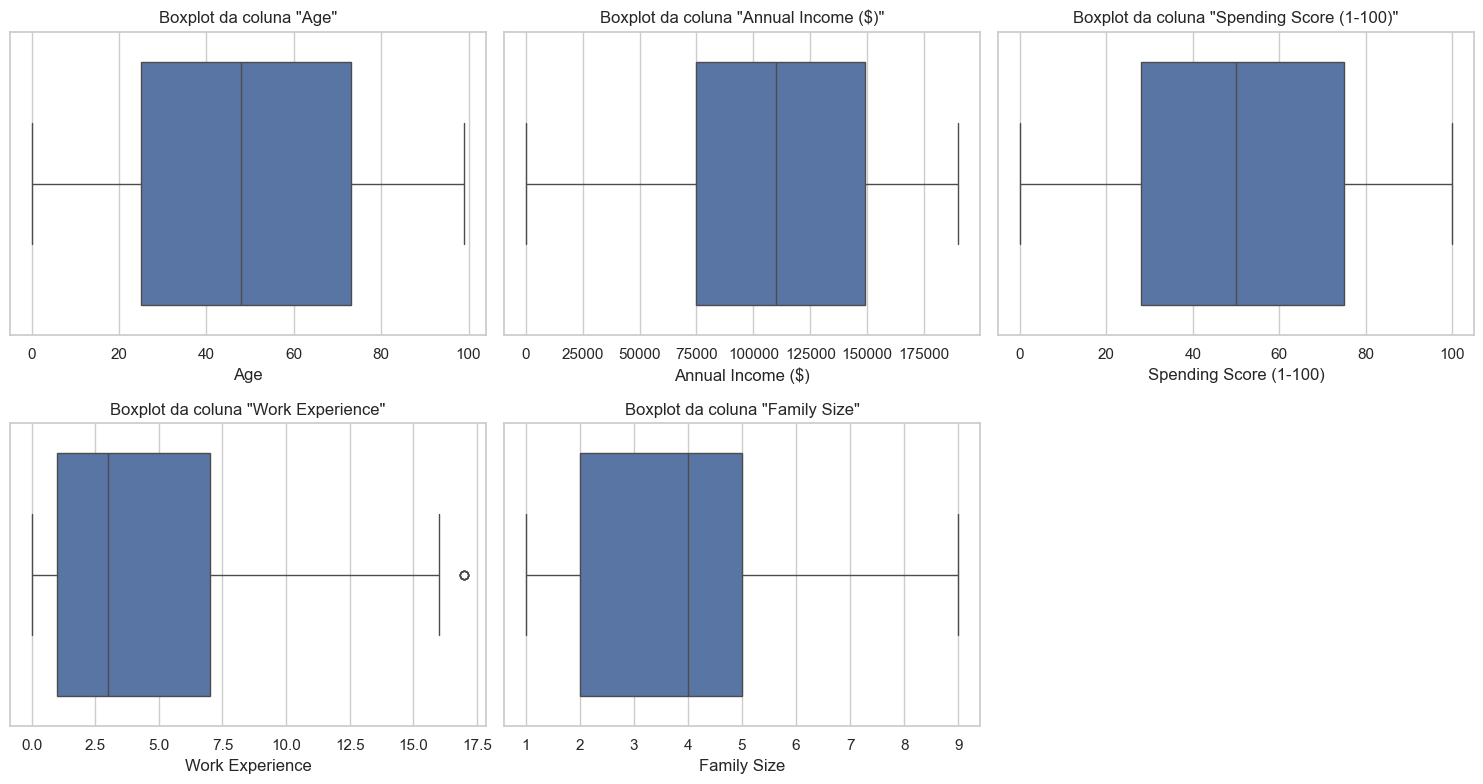

In [34]:
# Box plot para as variaveis Numéricas
plt.figure(figsize=(15, 8))
for i, col in enumerate(['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size'], start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=dataset[col])
    plt.title(f'Boxplot da coluna "{col}"')

plt.tight_layout()
plt.show()

Com base nos boxplot apresentados, podermos extrair as seguintes analíses:

- Boxplot da Idade (Age): A mediana da idade está em torno dos 45 anos, com a maior parte dos clientes entre 30 e 65 anos. Essa concentração revela uma clientela madura, provavelmente em fase de estabilidade financeira. A ausência de outliers reforça uma base de clientes consistente em termos de faixa etária. Estratégias que valorizem qualidade, segurança e confiança podem ter maior ressonância com esse público.

- Boxplot da Renda Anual (Annual Income):
A renda anual apresenta uma mediana ao redor de US$ 115.000, com distribuição ampla e simétrica, indicando uma base de clientes com bom poder aquisitivo. A ausência de outliers extremos sugere que os consumidores estão dentro de um perfil financeiro relativamente uniforme, o que facilita a criação de pacotes ou produtos direcionados para uma classe média-alta.

- Boxplot do Spending Score (1–100):
O Spending Score está bem distribuído com mediana próxima de 50, sinalizando um comportamento de consumo equilibrado. Isso sugere que, embora a maioria dos clientes gaste de forma moderada, há margem para incentivar maior engajamento e conversão através de ações como programas de pontos, descontos progressivos ou experiências exclusivas para os segmentos mais engajados.

- Boxplot da Experiência Profissional (Work Experience):
A mediana da experiência de trabalho está abaixo dos 5 anos, indicando que boa parte dos clientes está em início ou meio de carreira. A presença de alguns outliers com mais de 15 anos sugere uma minoria mais experiente. Isso abre espaço para segmentações: ações voltadas para jovens em ascensão profissional e, em paralelo, produtos mais sofisticados para os mais experientes.

- Boxplot do Tamanho da Família (Family Size):
A mediana gira em torno de 4 membros por família, com variação entre 2 e 6. A dispersão moderada e a simetria indicam diversidade no tamanho familiar. Isso permite atender tanto pequenos núcleos quanto famílias maiores, o que pode ser explorado em estratégias de mix de produtos, como kits familiares e promoções escalonadas por número de dependentes.

## **EDA: Variáveis Categóricas**

### **Gráfico de barras e colunas**

Gráficos de barras e colunas são usados para comparar quantidades e identificar variações ao longo do tempo ou entre diferentes categorias. Eles facilitam a visualização de dados quantitativos, tornando mais fácil a comparação de valores e a identificação de tendências.

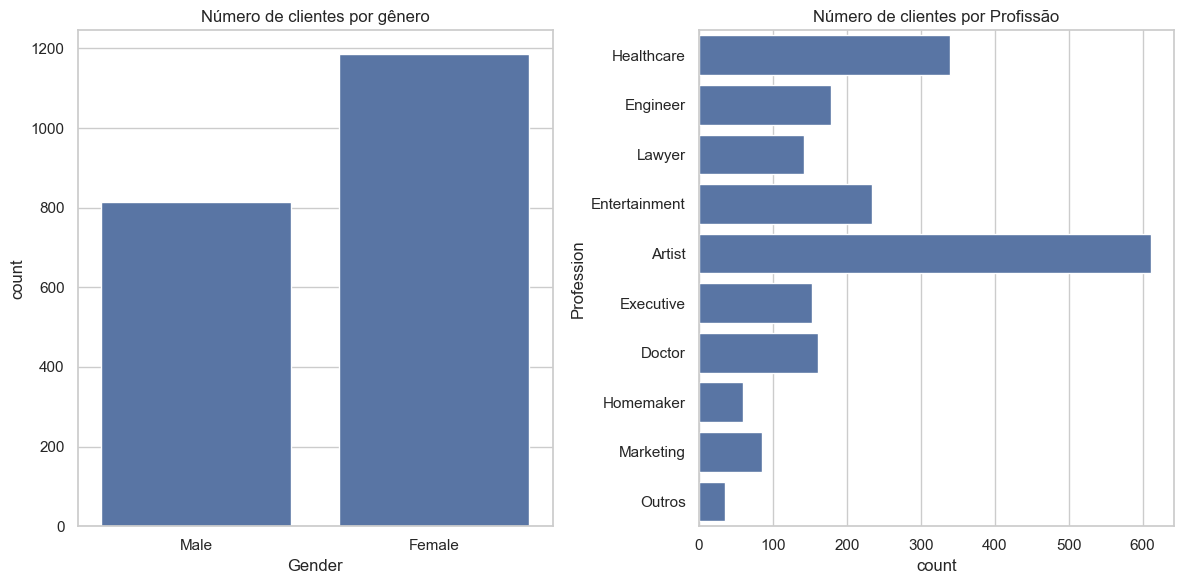

In [35]:
# Vizualização das variáveis categóricas
plt.figure(figsize=(12, 6))


# Countplot para clientes
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=dataset)
plt.title('Número de clientes por gênero')

# Countplot para profissão
plt.subplot(1, 2, 2)
sns.countplot(y='Profession', data=dataset)
plt.title('Número de clientes por Profissão')

plt.tight_layout()
plt.show()

Ao analisar as visualizações "Número de Clientes por Gênero” e Número de Clientes por Profissão”, surgem insights relevantes que lançam luz sobre aspectos importantes da demografia da base de clientes.

- Distribuição por Gênero: A maioria dos clientes no conjunto de dados é do sexo feminino. Essa predominância de gênero indica uma oportunidade para estratégias de marketing direcionadas, adaptadas às preferências e necessidades do público feminino.

- Distribuição por Profissão: As duas profissões mais comuns entre os clientes são artistas e profissionais da área da saúde. Esse alinhamento sugere uma presença significativa de pessoas com ocupações criativas e voltadas ao cuidado.

Considerações Estratégicas:
- Marketing Direcionado ao Público Feminino: Com uma representação maior de mulheres, as ações de marketing podem ser ajustadas para responder melhor às suas preferências. Personalizar promoções, produtos e serviços voltados a esse público pode aumentar o engajamento.

- Engajamento Especializado com Artistas e Profissionais da Saúde: Reconhecendo a relevância desses grupos profissionais, o negócio pode explorar estratégias específicas de engajamento, como ofertas personalizadas, eventos exclusivos ou programas de fidelidade que atendam aos interesses e necessidades desses segmentos.

Ações Práticas:
- Realizar pesquisas mais aprofundadas ou sessões de feedback para entender as preferências e expectativas específicas das clientes do sexo feminino.
- Explorar oportunidades de parcerias ou colaborações com artistas e profissionais da saúde para fortalecer o engajamento da marca dentro desses segmentos.


## **Pré-Processamento de dados**

O pré-processamento de dados é uma etapa essencial na análise e modelagem de dados, pois garante que as informações estejam limpas, padronizadas e prontas para alimentar algoritmos de machine learning. Ele transforma dados brutos em um formato mais adequado, minimizando ruídos, inconsistências e facilitando a extração de padrões.

Nesta etapa, utilizaremos diversas técnicas, como: cópia do dataset, tratamento de valores ausentes, codificação de variáveis categóricas, normalização de variáveis numéricas, e remoção de colunas irrelevantes.


### **Normalização das Variáveis Categóricas**
Na primeira etapa, iremos realizar:
- Uma cópia do conjunto de dados original, para evitar que os dados originais sejam perdidos.
- Utilizamos o Label Encoder nas Variáveis Categóricas. Em Modelos de machine learning exigem que todas as variáveis estejam em formato numérico. Assim, variáveis categóricas como "Gender" e "Profession" precisam ser codificadas, ou seja, converte cada categoria em um número inteiro distinto.

In [36]:
# Criando uma cópia do DataFrame original
encoded_data = dataset.copy()

# Codifica 'Gender' usando LabelEncoder
label_encoder = LabelEncoder()
encoded_data['Gender'] = label_encoder.fit_transform(dataset['Gender'])

# Codifica 'Profession' usando LabelEncoder
encoded_data['Profession'] = label_encoder.fit_transform(dataset['Profession'])

# Apresente as primeiras linhas do novo "DataFrame" após a aplicação do LabelEncoder.
print(encoded_data.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1       1   19              15000                      39   
1           2       1   21              35000                      81   
2           3       0   20              86000                       6   
3           4       0   23              59000                      77   
4           5       0   31              38000                      40   

   Profession  Work Experience  Family Size  
0           5                1            4  
1           2                3            3  
2           2                1            1  
3           7                0            2  
4           3                2            6  


### **Variáveis Numéricas**

Iremos utilziar o algoritmos de agrupamento K-Means, para isso vamos copiar a os dados depois do Label encoder, aplicar a função de MinMaxScaler para auxiliar a clusterização do kmens e iremos remover a coluna do CustomerID, já que essa coluna não agregam valor aos modelos analíticos e pode ser removida.

In [ ]:
# Seleciona as colunas de variáveis numéricas mais relevantes para a normalização
numerical_columns = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']

# Criando uma cópia para não perder o dataframe original, após o LabelEncoder.
normalized_data = encoded_data.copy()

# Inicializa o MinMaxScaler
scaler = MinMaxScaler() 

# Normaliza as variáveis Numéricas
normalized_data[numerical_columns] = scaler.fit_transform(encoded_data[numerical_columns]) 

# Removendo a coluna do "Customer ID"
normalized_data = normalized_data.drop('CustomerID', axis=1)

# Display do dataframe modificado
normalized_data.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,0.191919,0.078958,0.39,5,0.058824,0.375
1,1,0.212121,0.184236,0.81,2,0.176471,0.250
2,0,0.202020,0.452694,0.06,2,0.058824,0.000
3,0,0.232323,0.310569,0.77,7,0.000000,0.125
4,0,0.313131,0.200027,0.40,3,0.117647,0.625


### **Análise de Correlação**
Com os dados já tratados e normalizados, é importante compreender como as variáveis numéricas se relacionam entre si. Para isso, utilizamos a matriz de correlação, que mede o grau de associação linear entre as variáveis. Em seguida, visualizamos essa matriz usando um heatmap, facilitando a identificação de correlações fortes ou fracas.

Correlações próximas de 1 ou -1 indicam forte associação. Isso ajuda a identificar variáveis redundantes ou que têm impacto conjunto nos modelos.

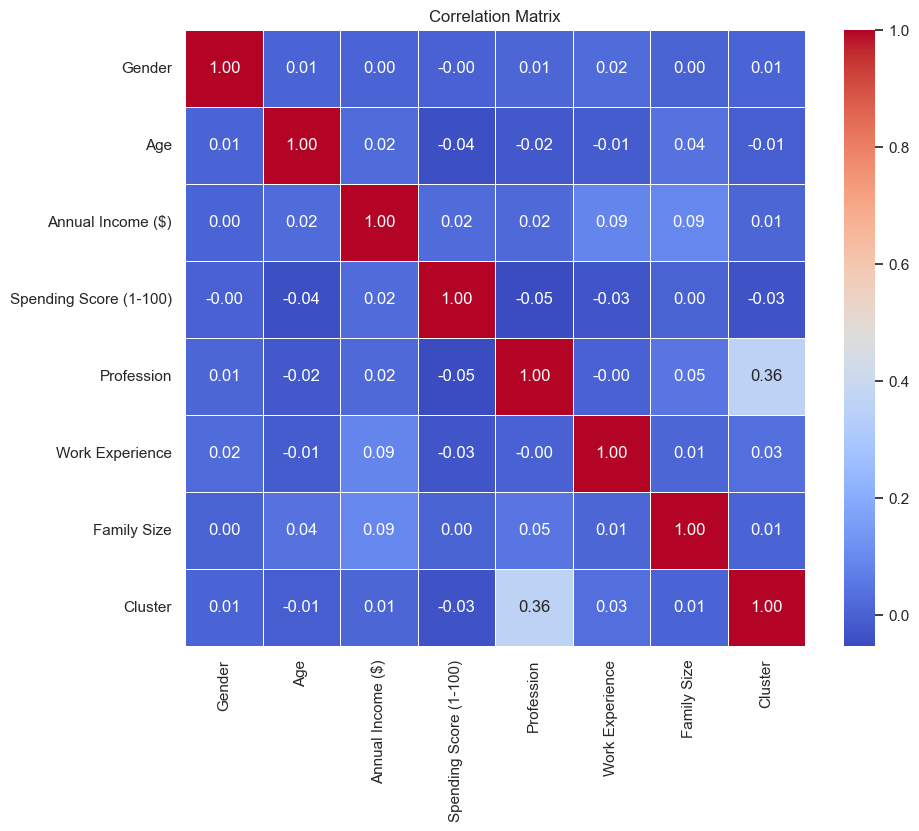

In [43]:
correlation_matrix = normalized_data.corr()

# Criando o Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### **Avaliação da Quantidade Ideal de Clusters**

Antes de aplicar o algoritmo K-Means, é necessário definir a quantidade ideal de agrupamentos (clusters). Para isso, utilizamos duas abordagens:
- Elbow Method: Avalia a inércia, no qual seria a soma das distâncias internas dentro dos clusters.
- Silhouette Score: Mede quanto os dados se ajustam ao seu cluster comparado aos outros.

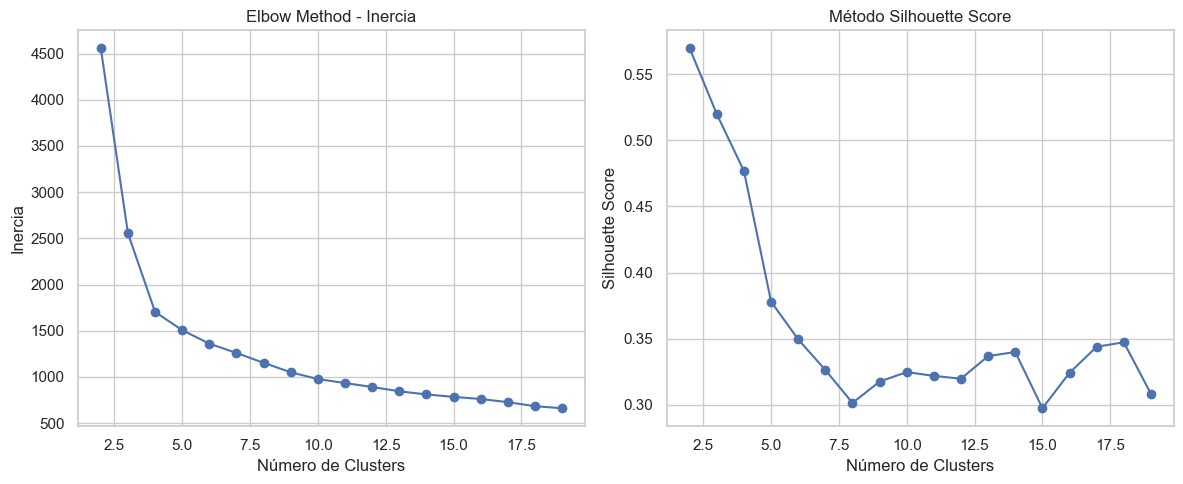

In [39]:
X = normalized_data.values

# Testando diferentes numero de clusters
cluster_range = range(2, 20)
inertia_values = []
silhouette_scores = []

for num_clusters in cluster_range:
    # Treinando o cluster por K-Means
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(X)
    
    # Calculando a inércia
    inertia_values.append(kmeans.inertia_)
    
    # Calculando silhouette score
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plotando o Elbow Method
plt.figure(figsize=(12, 5))

# Plotando Inertia
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method - Inercia')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')

# Plotando Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Método Silhouette Score')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

### **Aplicação do Algoritmo K-Means**

O ponto em que a inércia começa a diminuir mais lentamente (cotovelo) e/ou o maior Silhouette Score geralmente indica a melhor quantidade de clusters.
Com base nos gráficos podemos escolher entre 5 e 6 Cluster com base na Inercia, e poderiamos escolher 6 com base no Silhouette Score. Logo iremos escolher 6 Clusters.
Após definir o número ideal de clusters, aplicamos o algoritmo K-Means para segmentar os dados.

In [40]:
# Escolhando o numero de clusters
optimal_num_clusters = 5

# Aplicando o K-Means
kmeans_optimal = KMeans(n_clusters=optimal_num_clusters, random_state=42, n_init=10)
normalized_data['Cluster'] = kmeans_optimal.fit_predict(X)

# Exibir o DataFrame com clusters atribuídos
print(normalized_data.head())

   Gender       Age  Annual Income ($)  Spending Score (1-100)  Profession  \
0       1  0.191919           0.078958                    0.39           5   
1       1  0.212121           0.184236                    0.81           2   
2       0  0.202020           0.452694                    0.06           2   
3       0  0.232323           0.310569                    0.77           7   
4       0  0.313131           0.200027                    0.40           3   

   Work Experience  Family Size  Cluster  
0         0.058824        0.375        4  
1         0.176471        0.250        3  
2         0.058824        0.000        3  
3         0.000000        0.125        2  
4         0.117647        0.625        0  


### **Visualização dos Clusters**
Por fim, a visualização gráfica dos clusters facilita a interpretação dos grupos identificados. Utilizamos diferentes tipos de gráficos, como countplot, scatterplot, boxplot e pairplot.

C:\Users\ramom\AppData\Local\Temp\ipykernel_8080\4236532770.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=normalized_data, palette='viridis')


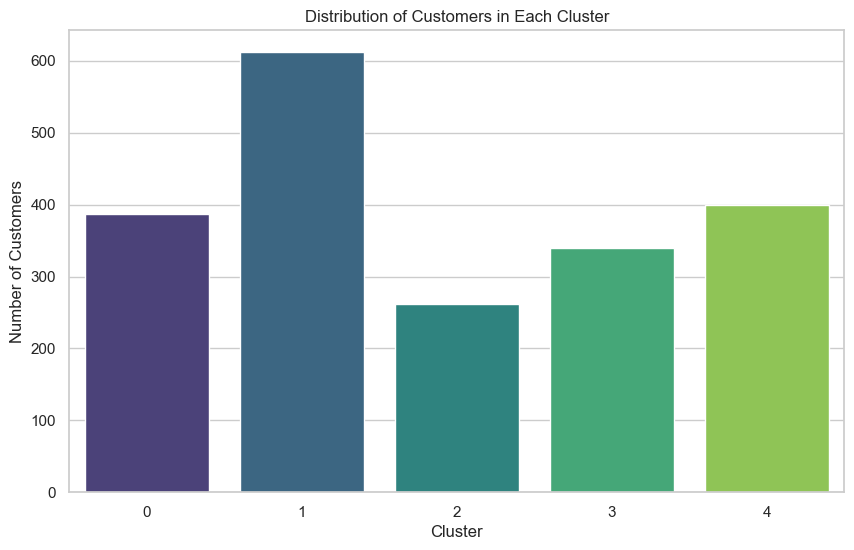

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=normalized_data, palette='viridis')
plt.title('Distribution of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

C:\Users\ramom\AppData\Local\Temp\ipykernel_8080\329306642.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Annual Income ($)', data=normalized_data, palette='viridis')
C:\Users\ramom\AppData\Local\Temp\ipykernel_8080\329306642.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=normalized_data, palette='viridis')
C:\Users\ramom\AppData\Local\Temp\ipykernel_8080\329306642.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Age', data=normalized_data, palette=

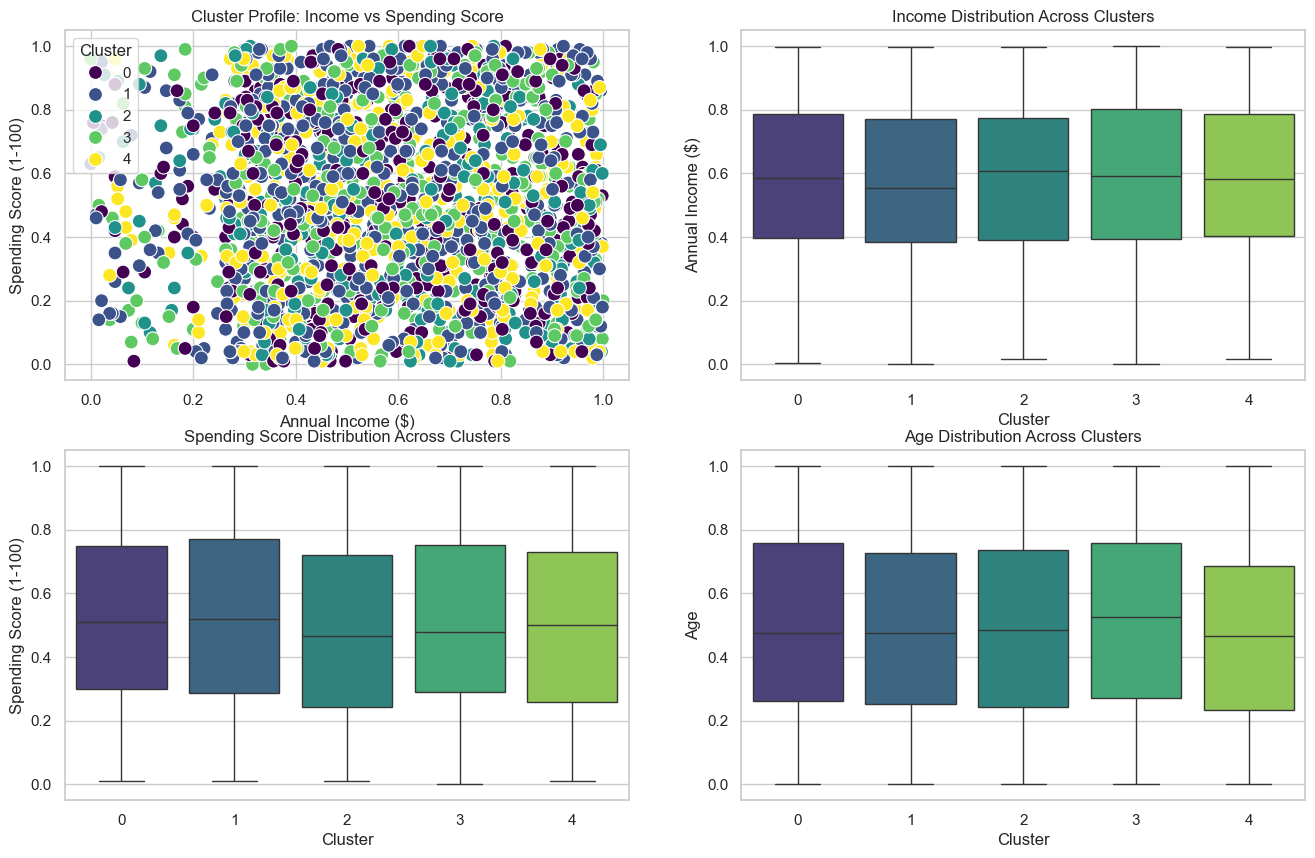

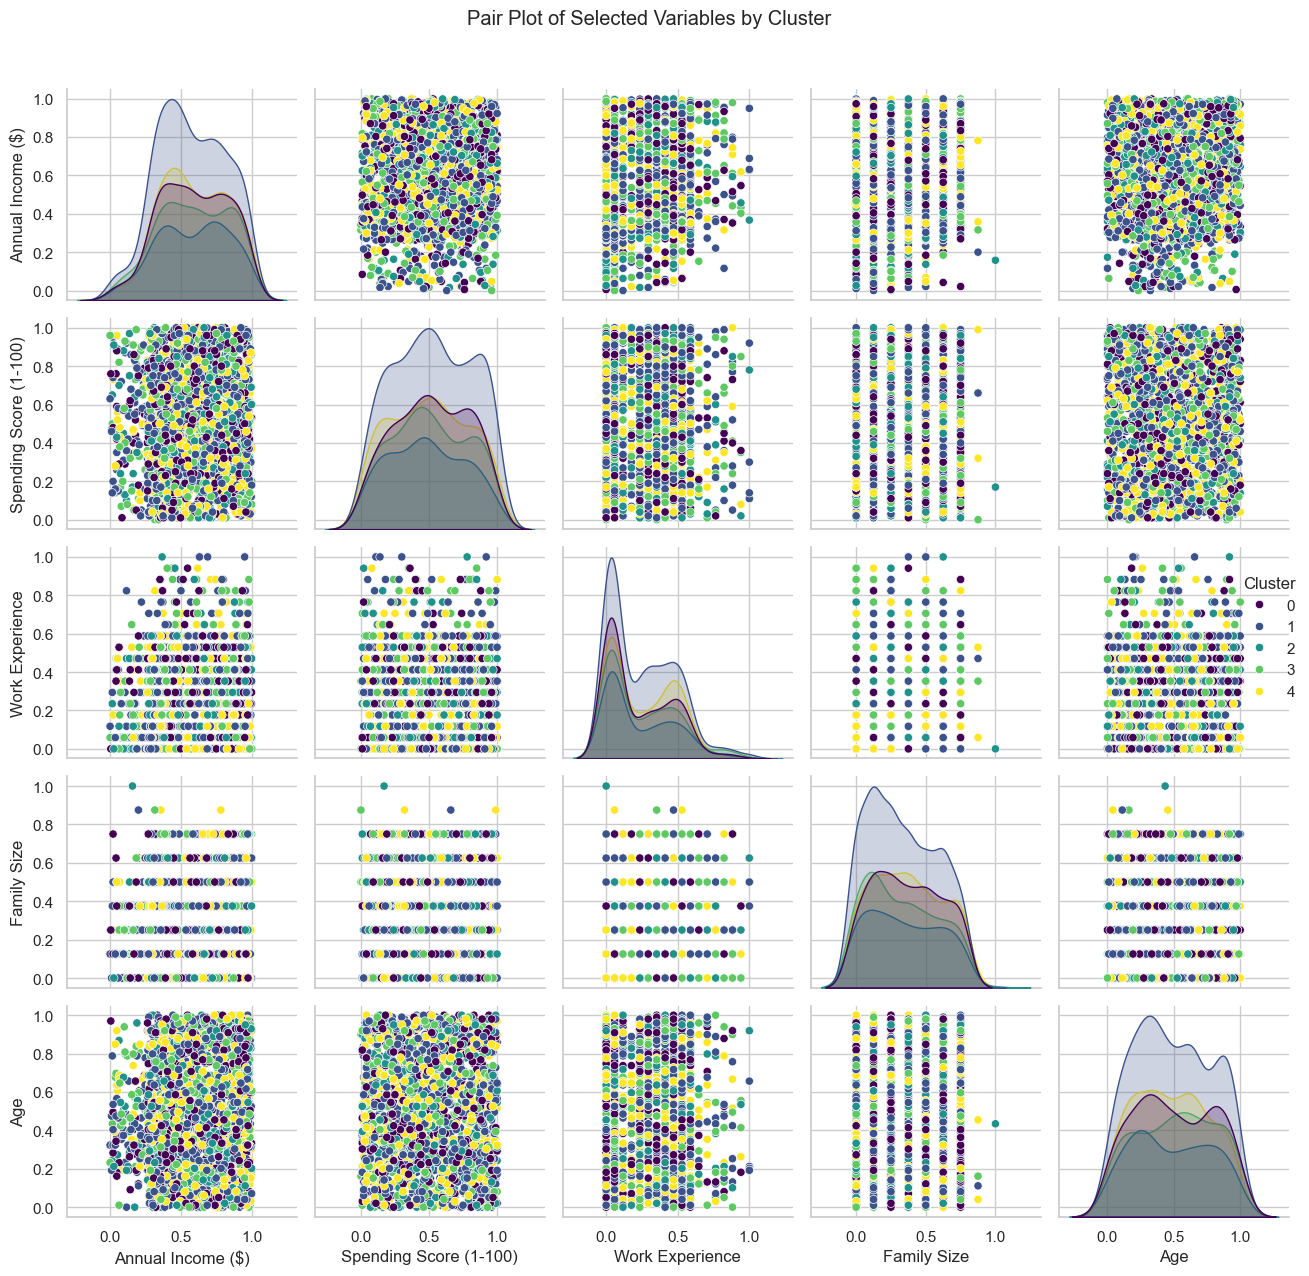

In [42]:
plt.figure(figsize=(16, 10))

# Gráfico de dispersão para pontuação de renda versus gastos com clusters diferenciados por cor
plt.subplot(2, 2, 1)
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', hue='Cluster', data=normalized_data, palette='viridis', s=100)
plt.title('Cluster Profile: Income vs Spending Score')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')

# Gráfico boxplot para distribuição de renda anual entre clusters
plt.subplot(2, 2, 2)
sns.boxplot(x='Cluster', y='Annual Income ($)', data=normalized_data, palette='viridis')
plt.title('Income Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Annual Income ($)')

# Gráfico boxplot para distribuição de pontuação de gastos entre clusters
plt.subplot(2, 2, 3)
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=normalized_data, palette='viridis')
plt.title('Spending Score Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Spending Score (1-100)')

# Gráfico boxplot para distribuição de idade entre clusters
plt.subplot(2, 2, 4)
sns.boxplot(x='Cluster', y='Age', data=normalized_data, palette='viridis')
plt.title('Age Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Age')

# Pair plot for selected variables
selected_vars = ['Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size', 'Age']
sns.pairplot(normalized_data, hue='Cluster', vars=selected_vars, palette='viridis')
plt.suptitle('Pair Plot of Selected Variables by Cluster', y=1.02)

plt.tight_layout()
plt.show()


### **Análise dos resultados**

A análise da distribuição dos clusters gerados pelo algoritmo K-Means revela uma segmentação multivariada e equilibrada entre os clientes. Observando o gráfico, é possível identificar que o agrupamento considera múltiplas variáveis em conjunto.

- Annual Income ($): Os clusters apresentam distribuições distintas de renda, indicando que essa variável ainda exerce papel relevante na formação dos grupos. No entanto, a separação não é abrupta, sugerindo que renda é apenas uma das dimensões consideradas, e não a única.

- Spending Score (1-100): Os grupos se sobrepõem parcialmente, mas há diferenças sutis na densidade de clientes com scores mais altos ou mais baixos. Isso sugere que os clusters capturam variações no comportamento de consumo, ainda que de forma mais diluída.

- Work Experience e Age: Observa-se que alguns clusters se destacam em faixas específicas de experiência ou idade, o que indica que características relacionadas ao estágio de vida e trajetória profissional têm papel na segmentação. Por exemplo, há grupos mais concentrados entre clientes jovens ou com pouca experiência de trabalho.

- Family Size: Embora a variação seja menor, é possível notar diferenças sutis na composição familiar entre os grupos, o que pode refletir estilos de vida distintos.

Além disso, podemos separar os cluster com as seguinte rótolos:

- Cluster 0: Jovens com perfil impulsivo, podemos dizer que são clientes que tendem a gastar mais, mesmo com renda limitada. Podemos dizer isso com base em:
    - Idade: ser predominante mais jovens
    - O spending Score: alto
    - Renda: média a baixa
    - Work Experience: baixa
- Cluster 1: Profissionais experientes e controlados, ou seja, clientes mais racionais e conservadores no consumo. Podemos dizer isso com base em:
    - Idade: é média a alta
    - O spending Score: Modeado a baixo
    - Renda: Alta
    - Work Experience: Alta
- Cluster 2: Famílias grandes com gasto moderado, clientes que buscam custo-benefício. Podemos dizer isso com base em:
    - O spending Score: Baixo e médio
    - Renda: Média
    - Family Size: Alta
- Cluster 3: Jovens de alta renda e gastos equilibrados, clientes com alto potencial de consumo, mas que demonstram comportamento de compra mais racional. Podemos dizer isso com base em:
    - Idade: Mais jovens
    - O spending Score: Médio
    - Renda: Alta
- Cluster 4: Clientes discretos e de baixa renda, grupo com menor propensão a gastos. Podemos dizer isso com base em:
    - O spending Score: Baixo
    - Renda: Baixa

A clusterização permitiu identificar perfis comportamentais distintos entre os clientes, com base em variáveis como renda, idade, score de gastos, experiência profissional e estrutura familiar. Isso permite que o proprietário da loja possa realizar determinadas ações dependendo do seu publico alvo que está querendo adquirir, por exemplo: 
- Realizar campanhas promocionais rápidas para aqueles do cluster 0, já que tendem ao gasto impulsivo.
- Programas de fidelidade para aqueles do cluster 1, já que preferem qualidade, confiança e recompensas a longo prazo.
- Pacotes familiares e promoções em volume para atingir o cluster 2, por se tratar de familias grandes.
- Campanhas de construção de marca e status para o cluster 3, já que são jovens com alta renda que, na maioria das vezes, vivem por status em grupos.
- Foco em acessibilidade e produtos essenciais para o cluster 4, pode se tratar de pessoas que economicamente estão mais vulnerável ou simplesmente ser mais conservador.


### **Conclusão**

O processo de pré-processamento e análise exploratória realizado permitiu transformar dados brutos em uma base sólida e consistente, pronta para análise de agrupamento com o algoritmo K-Means. Foram aplicadas as principais boas práticas da ciência de dados:
- Entendimento do dadaset para verificar que tipo de dados estamos trabalhando.
- Analise comportamental de distribuição dos dados
- Codificação de variáveis categóricas, convertendo atributos como gênero e profissão em valores numéricos compreensíveis pelo modelo.
- Tratamento implícito de valores ausentes, assegurando que dados incompletos não comprometessem o desempenho do algoritmo.
- Aplicação de normalização Min-Max, garantindo que variáveis com diferentes escalas tivessem influência proporcional no modelo.
- Remoção de atributos irrelevantes, como identificadores, que não agregam valor ao agrupamento.
- Cálculo da matriz de correlação, permitindo avaliar relações lineares entre variáveis e possíveis redundâncias.

Com os dados preparados, foi realizada uma análise cuidadosa para determinar o número ideal de clusters utilizando dois métodos complementares:
- O método do Elbow indicou uma redução significativa da inércia até aproximadamente 5 clusters.
- O silhouette score apresentou bom desempenho até 4-5 clusters, reforçando a escolha de segmentar os dados em 5 grupos distintos.

A aplicação do K-Means com 5 clusters possibilitou segmentar os clientes com base em padrões semelhantes de renda, gasto, tamanho da família e outros fatores relevantes. Essa segmentação é uma ferramenta poderosa para:
- Entender perfis de clientes
- Guiar estratégias de marketing segmentado
- Oferecer produtos e serviços personalizados
- Aumentar a fidelização e satisfação do cliente

### **Próximos passos**

Como próximos passos, podemos evoluir para o dataset analisado para um modelo supervisionado. Como agora temos rótolos de classificação de clientes no qual foi atribuido com os clusters, podemos usar esses rótulos como target em um problema de classificação, onde o objetivo poderia ser de prever qual cluster um novo cliente pertence, com base apenas nas variáveis de entrada.